In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns


## Review the data

In [5]:
ori=pd.read_csv("Loan_Defaulter.csv")
df=ori.copy()

In [6]:
df.shape

(30204, 25)

In [7]:
df.head(5)

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [8]:
df.dtypes

MyUnknownColumn    object
X1                 object
X2                 object
X3                 object
X4                 object
X5                 object
X6                 object
X7                 object
X8                 object
X9                 object
X10                object
X11                object
X12                object
X13                object
X14                object
X15                object
X16                object
X17                object
X18                object
X19                object
X20                object
X21                object
X22                object
X23                object
Y                  object
dtype: object

## Clean the data

In [9]:
df.isna().sum()

MyUnknownColumn    1
X1                 0
X2                 0
X3                 0
X4                 0
X5                 0
X6                 0
X7                 0
X8                 0
X9                 0
X10                0
X11                0
X12                0
X13                0
X14                0
X15                0
X16                0
X17                0
X18                0
X19                0
X20                0
X21                0
X22                0
X23                0
Y                  0
dtype: int64

In [10]:
df=df.dropna()
df

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30199,29996,220000,male,high school,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
30200,29997,150000,male,high school,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,not default
30201,29998,30000,male,university,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,default
30202,29999,80000,male,high school,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,default


In [11]:
df.duplicated().sum()

202

In [12]:
df[df.duplicated(keep=False)].sort_values("X1")

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
43,43,10000,male,university,2,22,0,0,0,0,...,3576,3670,4451,1500,2927,1000,300,1000,500,not default
67,67,10000,male,university,1,56,2,2,2,0,...,4062,4196,4326,2300,0,150,200,200,160,default
246,43,10000,male,university,2,22,0,0,0,0,...,3576,3670,4451,1500,2927,1000,300,1000,500,not default
270,67,10000,male,university,1,56,2,2,2,0,...,4062,4196,4326,2300,0,150,200,200,160,default
317,114,100000,female,graduate school,2,24,0,0,0,0,...,56076,60100,59713,2000,2677,3076,5080,3000,2033,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,169,90000,female,university,1,35,0,0,0,0,...,77317,85852,88290,3500,3500,3652,10000,4000,0,not default
228,25,90000,male,graduate school,2,23,0,0,0,-1,...,5398,6360,8292,5757,0,5398,1200,2045,2000,not default
25,25,90000,male,graduate school,2,23,0,0,0,-1,...,5398,6360,8292,5757,0,5398,1200,2045,2000,not default
203,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [13]:
df_clean=df.drop_duplicates(keep="first")
df_clean

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30199,29996,220000,male,high school,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
30200,29997,150000,male,high school,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,not default
30201,29998,30000,male,university,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,default
30202,29999,80000,male,high school,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,default


In [14]:
df_clean.columns=df_clean.loc[0]

In [15]:
df_clean=df_clean.drop(index=0)
df_clean

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30199,29996,220000,male,high school,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
30200,29997,150000,male,high school,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,not default
30201,29998,30000,male,university,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,default
30202,29999,80000,male,high school,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,default


In [16]:
df_clean.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [17]:
df_clean=df_clean.drop(columns=['PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
df_clean

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,5,50000,male,university,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30199,29996,220000,male,high school,1,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
30200,29997,150000,male,high school,2,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,not default
30201,29998,30000,male,university,2,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,default
30202,29999,80000,male,high school,1,41,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,default


In [18]:
temp_type=[int,int,object, object, int, int]+[float]*12+[object]
print(temp_type)

[<class 'int'>, <class 'int'>, <class 'object'>, <class 'object'>, <class 'int'>, <class 'int'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'object'>]


In [19]:
temp_dict={key:value for key,value in zip(df_clean.columns, temp_type)}
temp_dict

{'ID': int,
 'LIMIT_BAL': int,
 'SEX': object,
 'EDUCATION': object,
 'MARRIAGE': int,
 'AGE': int,
 'BILL_AMT1': float,
 'BILL_AMT2': float,
 'BILL_AMT3': float,
 'BILL_AMT4': float,
 'BILL_AMT5': float,
 'BILL_AMT6': float,
 'PAY_AMT1': float,
 'PAY_AMT2': float,
 'PAY_AMT3': float,
 'PAY_AMT4': float,
 'PAY_AMT5': float,
 'PAY_AMT6': float,
 'default payment next month': object}

In [20]:
df_clean=df_clean.astype(temp_dict)

In [21]:
df_clean=df_clean.set_index("ID").sort_index()
df_clean

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,
1,20000,female,university,1,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,default
2,120000,female,university,2,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,default
3,90000,female,university,2,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,not default
4,50000,female,university,1,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,not default
5,50000,male,university,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,male,high school,1,39,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,not default
29997,150000,male,high school,2,43,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,not default
29998,30000,male,university,2,37,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,default


In [22]:
df_clean.dtypes

0
LIMIT_BAL                       int32
SEX                            object
EDUCATION                      object
MARRIAGE                        int32
AGE                             int32
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default payment next month     object
dtype: object

## Plotting 

In [23]:
def my_color():
    return random.choice(list(mcolors.CSS4_COLORS.keys()))

In [24]:
my_color()

'blanchedalmond'

<Axes: title={'center': 'education'}>

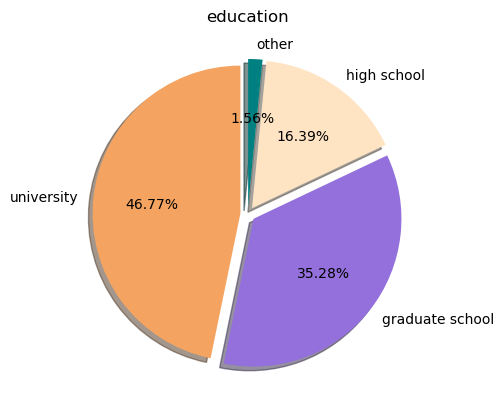

In [25]:
education = df_clean["EDUCATION"].value_counts()
education.plot(kind="pie",autopct="%.2f%%",label="",title="education",
              explode=[0.05 for i in range(len(education))], shadow=True, startangle=90, 
              colors= [my_color() for i in range(len(education))])


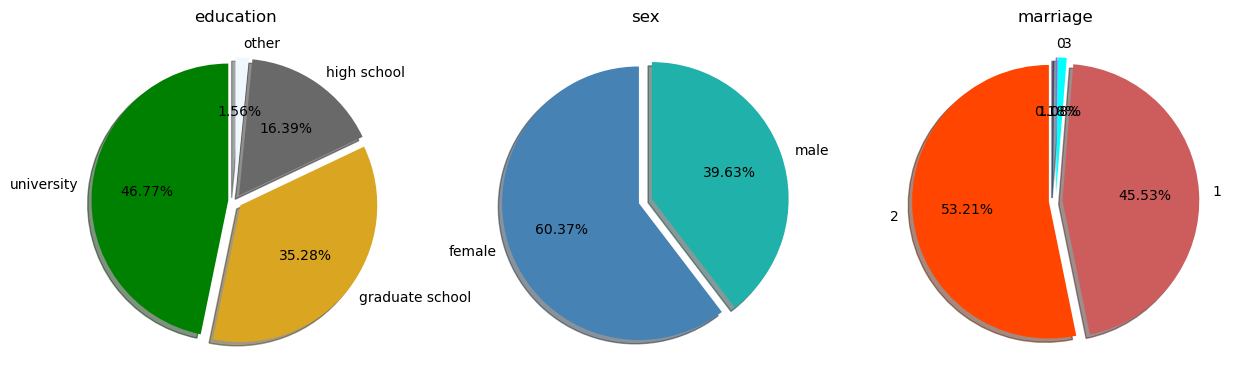

In [26]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
education = df_clean["EDUCATION"].value_counts()
education.plot(kind="pie",autopct="%.2f%%",label="",title="education",
              explode=[0.05 for i in range(len(education))], shadow=True, startangle=90, 
              colors= [my_color() for i in range(len(education))],ax=axs[0])
sex = df_clean["SEX"].value_counts()
sex.plot(kind="pie",autopct="%.2f%%",label="",title="sex",
              explode=[0.05 for i in range(len(sex))], shadow=True, startangle=90, 
              colors= [my_color() for i in range(len(sex))],ax=axs[1])
marriage = df_clean["MARRIAGE"].value_counts()
marriage.plot(kind="pie",autopct="%.2f%%",label="",title="marriage",
              explode=[0.05 for i in range(len(marriage))], shadow=True, startangle=90, 
              colors= [my_color() for i in range(len(marriage))],ax=axs[2])
plt.show()

## Remove outliers

In [27]:
temp = df_clean["BILL_AMT1"]
temp

ID
1          3913.0
2          2682.0
3         29239.0
4         46990.0
5          8617.0
           ...   
29996    188948.0
29997      1683.0
29998      3565.0
29999     -1645.0
30000     47929.0
Name: BILL_AMT1, Length: 30000, dtype: float64

<Axes: ylabel='Frequency'>

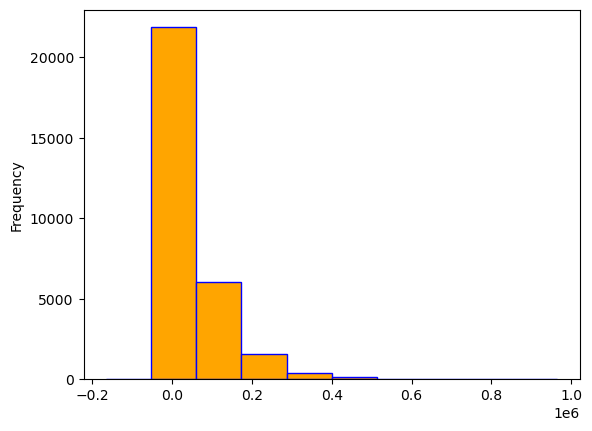

In [28]:
temp.plot(kind="hist", color="orange",edgecolor="blue", bins=10)


In [29]:
temp.describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

<Axes: >

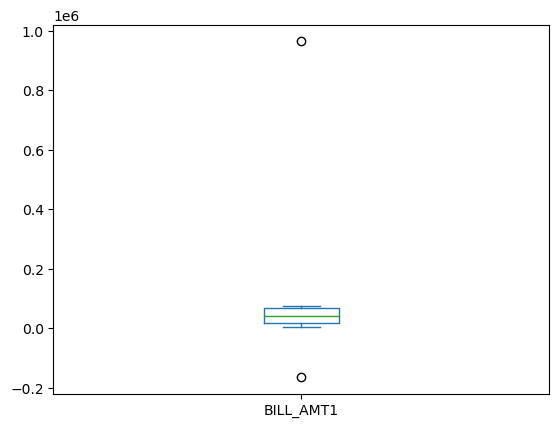

In [30]:
temp.describe().plot(kind="box")

In [31]:
q1=temp.quantile(0.25)
q1
q3=temp.quantile(0.75)
iqr=q3-q1
upperbound=q3+1.5*iqr
lowerbound=q1-1.5*iqr
temp_drop=temp[(temp<upperbound) & (temp>lowerbound)]

<Axes: >

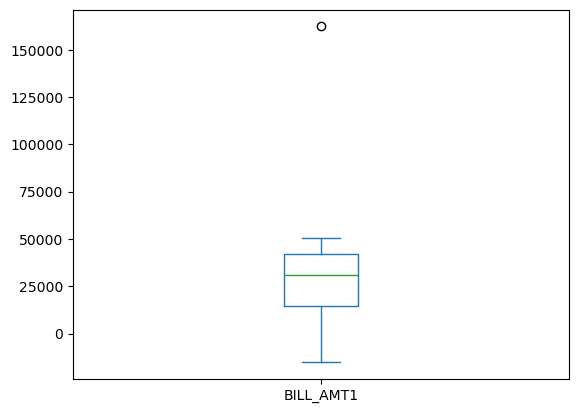

In [32]:
temp_drop.describe().plot(kind="box")

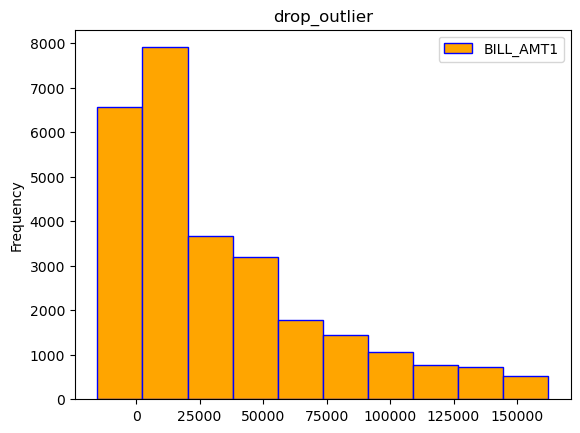

In [33]:
temp_drop.plot(kind="hist", color="orange",edgecolor="blue", bins=10, legend=True, grid = False, title = "drop_outlier")
plt.show()

---
---

In [34]:
df_drop_outlier=df_clean.copy()

In [35]:
def remove_outlier(frame, columns, plot=False): 
    temp = frame.loc[:,columns]
    if plot==True: 
        fig,axs=plt.subplots(1,2,figsize=(16,7))
        temp.plot(kind="hist", color="green",edgecolor="black", bins=10, title="with outlier", ax=axs[0])
    q1=temp.quantile(0.25)
    q1
    q3=temp.quantile(0.75)
    iqr=q3-q1
    upperbound=q3+1.5*iqr
    lowerbound=q1-1.5*iqr
    temp_drop=temp[(temp>=upperbound) | (temp<=lowerbound)]
    drop_index=temp_drop.index
    frame.drop(index=drop_index, inplace=True)
    if plot==True:
        frame.loc[:,columns].plot(kind="hist", color="orange",edgecolor="blue", bins=10, legend=True, grid = False, title = "drop_outlier")
    

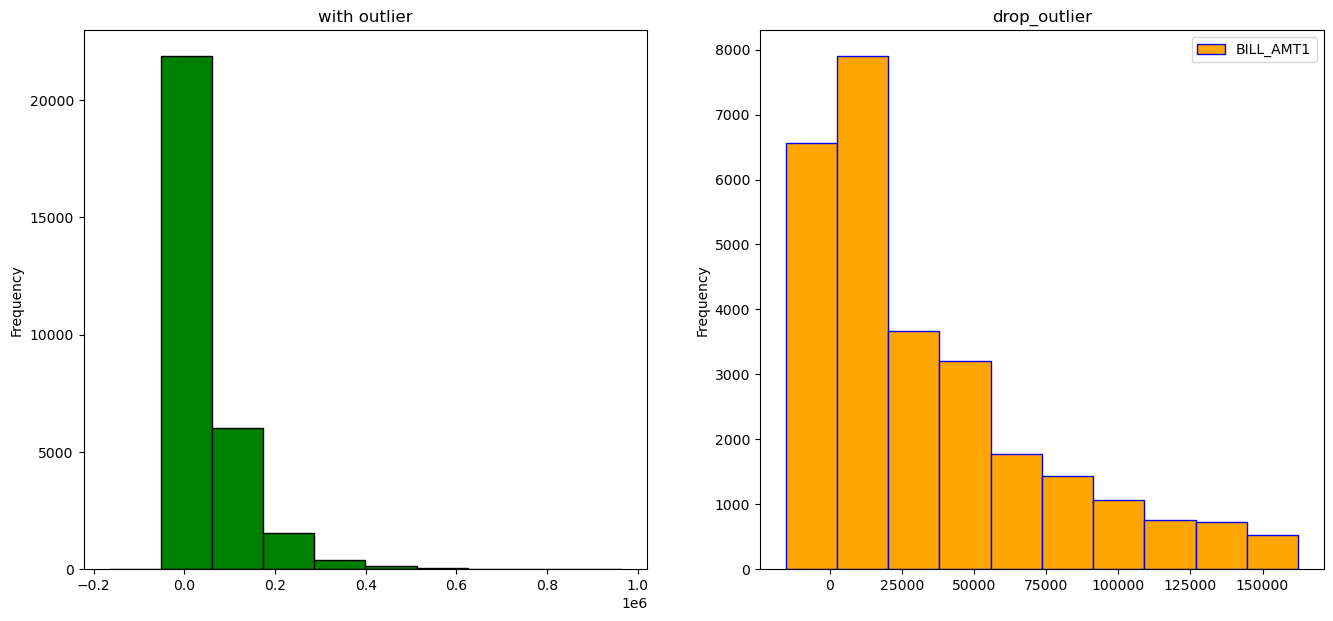

In [36]:
remove_outlier(df_drop_outlier, "BILL_AMT1", True)

In [37]:
df_drop_outlier.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [38]:
df_clean.shape

(30000, 18)

In [39]:
def drop_othercolumns():
    drop_columns=df_drop_outlier.columns[6:17]
    for i in drop_columns:
        before = df_drop_outlier.shape[0]
        remove_outlier(df_drop_outlier, i)
        after = df_drop_outlier.shape[0]
        print(f"column:{i} has {before-after} outlier.")
    

In [40]:
drop_othercolumns()

column:BILL_AMT2 has 1381 outlier.
column:BILL_AMT3 has 684 outlier.
column:BILL_AMT4 has 1060 outlier.
column:BILL_AMT5 has 929 outlier.
column:BILL_AMT6 has 527 outlier.
column:PAY_AMT1 has 2351 outlier.
column:PAY_AMT2 has 1544 outlier.
column:PAY_AMT3 has 1466 outlier.
column:PAY_AMT4 has 1221 outlier.
column:PAY_AMT5 has 988 outlier.
column:PAY_AMT6 has 921 outlier.


In [41]:
df_drop_outlier.shape

(14528, 18)

In [42]:
df_drop_outlier=df_drop_outlier.reset_index(drop=True)

In [43]:
df_drop_outlier.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,1,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,default
1,120000,female,university,2,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,default
2,50000,female,university,1,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,not default
3,50000,male,graduate school,2,37,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,not default
4,100000,female,university,2,23,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,not default


In [44]:
df_drop_outlier.to_csv("clean_data.csv", index=True, header=True)

## Machine Learning Using Logistic Regression

In [45]:
df_ml=df_drop_outlier.copy()
df_ml.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,1,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,default
1,120000,female,university,2,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,default
2,50000,female,university,1,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,not default
3,50000,male,graduate school,2,37,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,not default
4,100000,female,university,2,23,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,not default


In [46]:
df_dummpy=df_ml[["SEX","EDUCATION"]]
df_dummpy=pd.get_dummies(df_dummpy)
df_dummpy

,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,True,False,False,False,False,True
1,True,False,False,False,False,True
2,True,False,False,False,False,True
3,False,True,True,False,False,False
4,True,False,False,False,False,True
...,...,...,...,...,...,...
14523,False,True,True,False,False,False
14524,False,True,True,False,False,False
14525,False,True,False,False,False,True
14526,False,True,False,True,False,False


In [47]:
df_amount=df_ml.drop(columns=["SEX","EDUCATION"])
df_amount.columns

Index(['LIMIT_BAL', 'MARRIAGE', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [48]:
df_number=pd.concat([df_dummpy, df_amount],axis=1)
df_number.head()

,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,LIMIT_BAL,MARRIAGE,AGE,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,True,False,False,False,False,True,20000,1,24,3913.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,default
1,True,False,False,False,False,True,120000,2,26,2682.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,default
2,True,False,False,False,False,True,50000,1,37,46990.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,not default
3,False,True,True,False,False,False,50000,2,37,64400.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,not default
4,True,False,False,False,False,True,100000,2,23,11876.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,not default


In [49]:
y=df_number["default payment next month"]
X=df_number.drop(columns="default payment next month")


In [51]:
XS=StandardScaler().fit_transform(X)
XS[:5]

array([[ 0.82870537, -0.82870537, -0.66019458, -0.48450405, -0.11357059,
         1.01288588, -0.92180526, -1.05651313, -1.15884894, -0.74858568,
        -0.76895946, -0.87196202, -0.90546495, -0.8910556 , -0.85636331,
        -1.09347264, -0.55930047, -1.00829235, -0.93536126, -0.93715089,
        -0.90882658],
       [ 0.82870537, -0.82870537, -0.66019458, -0.48450405, -0.11357059,
         1.01288588,  0.00398149,  0.83842795, -0.95307811, -0.79779249,
        -0.82855635, -0.7775974 , -0.72915677, -0.68708272, -0.66094045,
        -1.09347264, -0.32160214, -0.09291313,  0.05768086, -0.93715089,
         1.14307148],
       [ 0.82870537, -0.82870537, -0.66019458, -0.48450405, -0.11357059,
         1.01288588, -0.64406923, -1.05651313,  0.17866142,  0.97333289,
         1.18432091,  1.42924673,  0.62020436,  0.81859727,  0.91430808,
         0.31518539,  0.45722295,  0.09016271,  0.15698507,  0.14765413,
         0.11712245],
       [-1.20670149,  1.20670149,  1.51470494, -0.48450405

In [52]:
X_train1,X_test1,y_train1, y_test1=train_test_split(XS,y,random_state=1)

## Logistic Regression Model

In [53]:
lr_model= LogisticRegression(random_state=1)

In [54]:
lr_model.fit(X_train1,y_train1)

LogisticRegression(random_state=1)

In [55]:
y_pred1=lr_model.predict(X_test1)

In [56]:
data=confusion_matrix(y_test1, y_pred1)
data

array([[  22, 1010],
       [  11, 2589]], dtype=int64)

In [57]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

     default       0.67      0.02      0.04      1032
 not default       0.72      1.00      0.84      2600

    accuracy                           0.72      3632
   macro avg       0.69      0.51      0.44      3632
weighted avg       0.70      0.72      0.61      3632



<Axes: >

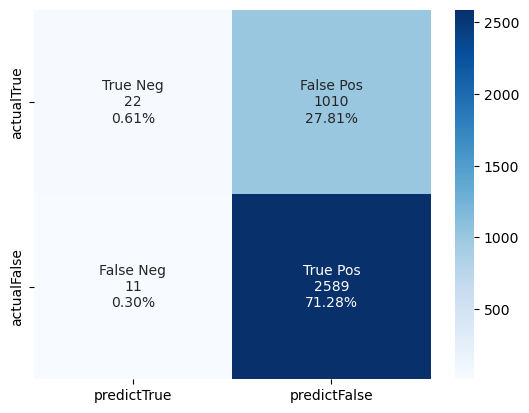

In [58]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in data.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in data.flatten() / np.sum(data)]
labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(data, annot = labels, fmt ='',
			cmap = "Blues",
			yticklabels = ["actualTrue", "actualFalse"],
			xticklabels = ["predictTrue", "predictFalse"])